In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fl_mortality = pd.read_csv("../00_source_data/fl_mortality.csv", sep=",", index_col=0)
tx_mortality = pd.read_csv("../00_source_data/tx_mortality.csv", sep=",", index_col=0)
wa_mortality = pd.read_csv("../00_source_data/wa_mortality.csv", sep=",", index_col=0)

### Plot Pre-Post Policy for Florida, Texas, and Washington

#### Florida

In [3]:
# seperate to pre and post policy periods for FL

x_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Year"])
y_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Mortality Rate"])

x_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Year"])
y_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Mortality Rate"])

In [4]:
# plot the figure

def plot_pre_post(State_ABBR, x_pre, y_pre, x_post, y_post, policy_year):
    import warnings
    warnings.filterwarnings("ignore")
    m, b = np.polyfit(x_pre, y_pre, 1)
    plt.plot(x_pre, m * x_pre + b)
    ax = sns.regplot(x_pre, y_pre, ci=95, scatter=False)
    m, b = np.polyfit(x_post, y_post, 1)
    plt.plot(x_post, m * x_post + b)
    ax = sns.regplot(x_post, y_post, ci=95, scatter=False)
    plt.xlabel("Year")
    plt.ylabel("Mortality Rate")
    plt.title(State_ABBR + " Pre-Post Model Graph")
    plt.axvline(x=policy_year, color="black", ls=":")
    plt.text(policy_year + 0.2, y_post.mean() * 0.85, "Policy Change", fontsize=12)
    plt.text(2003.2, y_pre.mean() * 1.1, "CI:95%", fontsize=10)
    plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)
    plt.show()

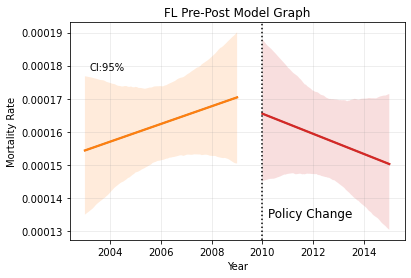

In [5]:
plot_pre_post("FL", x_pre_fl, y_pre_fl, x_post_fl, y_post_fl, 2010)

#### Texas

In [6]:
# seperate to pre and post policy periods for TX

x_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Mortality Rate"])

x_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Year"])
y_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Mortality Rate"])

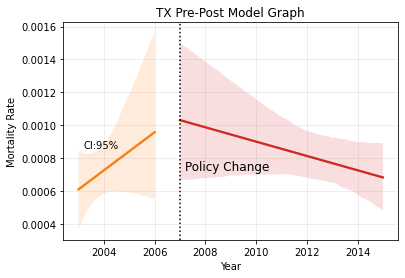

In [7]:
plot_pre_post("TX", x_pre_tx, y_pre_tx, x_post_tx, y_post_tx, 2007)

#### Washington

In [8]:
# seperate to pre and post policy periods for WA

x_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Mortality Rate"])

x_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Year"])
y_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Mortality Rate"])

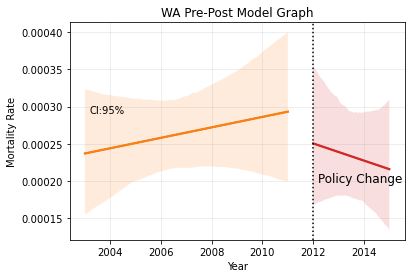

In [9]:
plot_pre_post("WA", x_pre_wa, y_pre_wa, x_post_wa, y_post_wa, 2012)